# 2.a) Data Exploration
Plot the histograms of variables 2-18 in the data (i.e., 17
histograms total). Provide a brief discussion on your intuition regarding the variables and the
resulting histogram

### Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import LocalOutlierFactor
from itertools import product

import warnings
from warnings import filterwarnings

### Load Dataset

In [52]:
# Load the data from the provided CSV file
file_path = 'data.csv'
data = pd.read_csv(file_path)

print('This data set has {} rows and {} columns.\n'.format(data.shape[0],data.shape[1]))
data.info()

This data set has 8950 rows and 18 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX        

Description of each Feature
<table  width = 100%>
  <thead style = "background-color : grey;">
    <tr>
      <th style="text-align: left;">Variable Name</th>
      <th style="text-align: left;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: left;">BALANCE</td>
      <td style="text-align: left;">Outstanding balance on the credit card account</td>
    </tr>
    <tr>
      <td style="text-align: left;">BALANCE_FREQUENCY</td>
      <td style="text-align: left;">How often the balance is updated</td>
    </tr>
    <tr>
      <td style="text-align: left;">PURCHASES</td>
      <td style="text-align: left;">Total amount of purchases made on the credit card</td>
    </tr>
    <tr>
      <td style="text-align: left;">ONEOFF_PURCHASES</td>
      <td style="text-align: left;">Total amount of one-time purchases made on the credit card</td>
    </tr>
    <tr>
      <td style="text-align: left;">INSTALLMENTS_PURCHASES</td>
      <td style="text-align: left;">Total amount of purchases made on the credit card that were paid back in installments</td>
    </tr>
    <tr>
      <td style="text-align: left;">CASH_ADVANCE</td>
      <td style="text-align: left;">Amount of cash withdrawn from the credit card account as a cash advance</td>
    </tr>
    <tr>
      <td style="text-align: left;">PURCHASES_FREQUENCY</td>
      <td style="text-align: left;">How often purchases are made on the credit card</td>
    </tr>
    <tr>
      <td style="text-align: left;">ONEOFF_PURCHASES_FREQUENCY</td>
      <td style="text-align: left;">How often one-time purchases are made on the credit card</td>
    </tr>
    <tr>
      <td style="text-align: left;">PURCHASES_INSTALLMENTS_FREQUENCY</td>
      <td style="text-align: left;">How often purchases that are paid back in installments are made on the credit card</td>
    </tr>
    <tr>
      <td style="text-align: left;">CASH_ADVANCE_FREQUENCY</td>
      <td style="text-align: left;">How often cash advances are taken out on the credit card</td>
    </tr>
    <tr>
      <td style="text-align: left;">CASH_ADVANCE_TRX</td>
      <td style="text-align: left;">Number of cash advance transactions made on the credit card account</td>
    </tr>
    <tr>
      <td style="text-align: left;">PURCHASES_TRX</td>
      <td style="text-align: left;">Number of purchase transactions made on the credit card account</td>
    </tr>
    <tr>
      <td style="text-align: left;">CREDIT_LIMIT</td>
      <td style="text-align: left;">Maximum amount of credit the customer is allowed to use on the credit card</td>
    </tr>
    <tr>
      <td style="text-align: left;">PAYMENTS</td>
      <td style="text-align: left;">Total amount of payments made on the credit card account</td>
    </tr>
    <tr>
      <td style="text-align: left;">MINIMUM_PAYMENTS</td>
      <td style="text-align: left;">Minimum amount of payments required on the credit card account</td>
    </tr>
    <tr>
      <td style="text-align: left;">PRC_FULL_PAYMENT</td>
      <td style="text-align: left;">Percentage of the balance that is paid in full by the customer each month</td>
    </tr>
    <tr>
      <td style="text-align: left;">TENURE</td>
      <td style="text-align: left;">Number of years the customer has been using the credit card account</td>
    </tr>
  </tbody>
</table>


## Data Cleaning

In [53]:
def null_values(data):
    nv=pd.DataFrame(data.isnull().sum()).rename(columns={0:'Missing_Records'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

# We can fill the null values with mean.
data['MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].fillna(data.MINIMUM_PAYMENTS.median())
data.dropna(inplace=True)

In [54]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,1564.647593,2081.584016,0.000000,128.365782,873.680279,2054.372848,19043.13856
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8949.0,1003.316936,2136.727848,0.000000,39.800000,361.490000,1110.170000,49039.57000
ONEOFF_PURCHASES,8949.0,592.503572,1659.968851,0.000000,0.000000,38.000000,577.830000,40761.25000
INSTALLMENTS_PURCHASES,8949.0,411.113579,904.378205,0.000000,0.000000,89.000000,468.650000,22500.00000
CASH_ADVANCE,8949.0,978.959616,2097.264344,0.000000,0.000000,0.000000,1113.868654,47137.21176
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8949.0,0.135141,0.200132,0.000000,0.000000,0.000000,0.222222,1.50000


In [55]:
A = data.nunique()
A

CUST_ID                             8949
BALANCE                             8870
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4322
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8710
MINIMUM_PAYMENTS                    8635
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [56]:
# We can drop the "CUST_ID" columns because we will not use it.
data=data.drop('CUST_ID',axis=1)


In [57]:
data.skew()

BALANCE                              2.393270
BALANCE_FREQUENCY                   -2.024193
PURCHASES                            8.143969
ONEOFF_PURCHASES                    10.044622
INSTALLMENTS_PURCHASES               7.298823
CASH_ADVANCE                         5.166323
PURCHASES_FREQUENCY                  0.059970
ONEOFF_PURCHASES_FREQUENCY           1.535453
PURCHASES_INSTALLMENTS_FREQUENCY     0.509023
CASH_ADVANCE_FREQUENCY               1.828644
CASH_ADVANCE_TRX                     5.720976
PURCHASES_TRX                        4.630493
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907465
MINIMUM_PAYMENTS                    13.851853
PRC_FULL_PAYMENT                     1.942641
TENURE                              -2.944788
dtype: float64

> We can drop CUSTID , because this column does not have any information.
> 
> TENURE has 7 unique value, so it is a non continuous parameter.

## Section (a) Data Visualization using Histograms

(a) Data exploration. Plot the histograms of variables 2-18 in the data (i.e., 17 histograms total). Provide a brief discussion on your intuition regarding the variables and the resulting histograms.

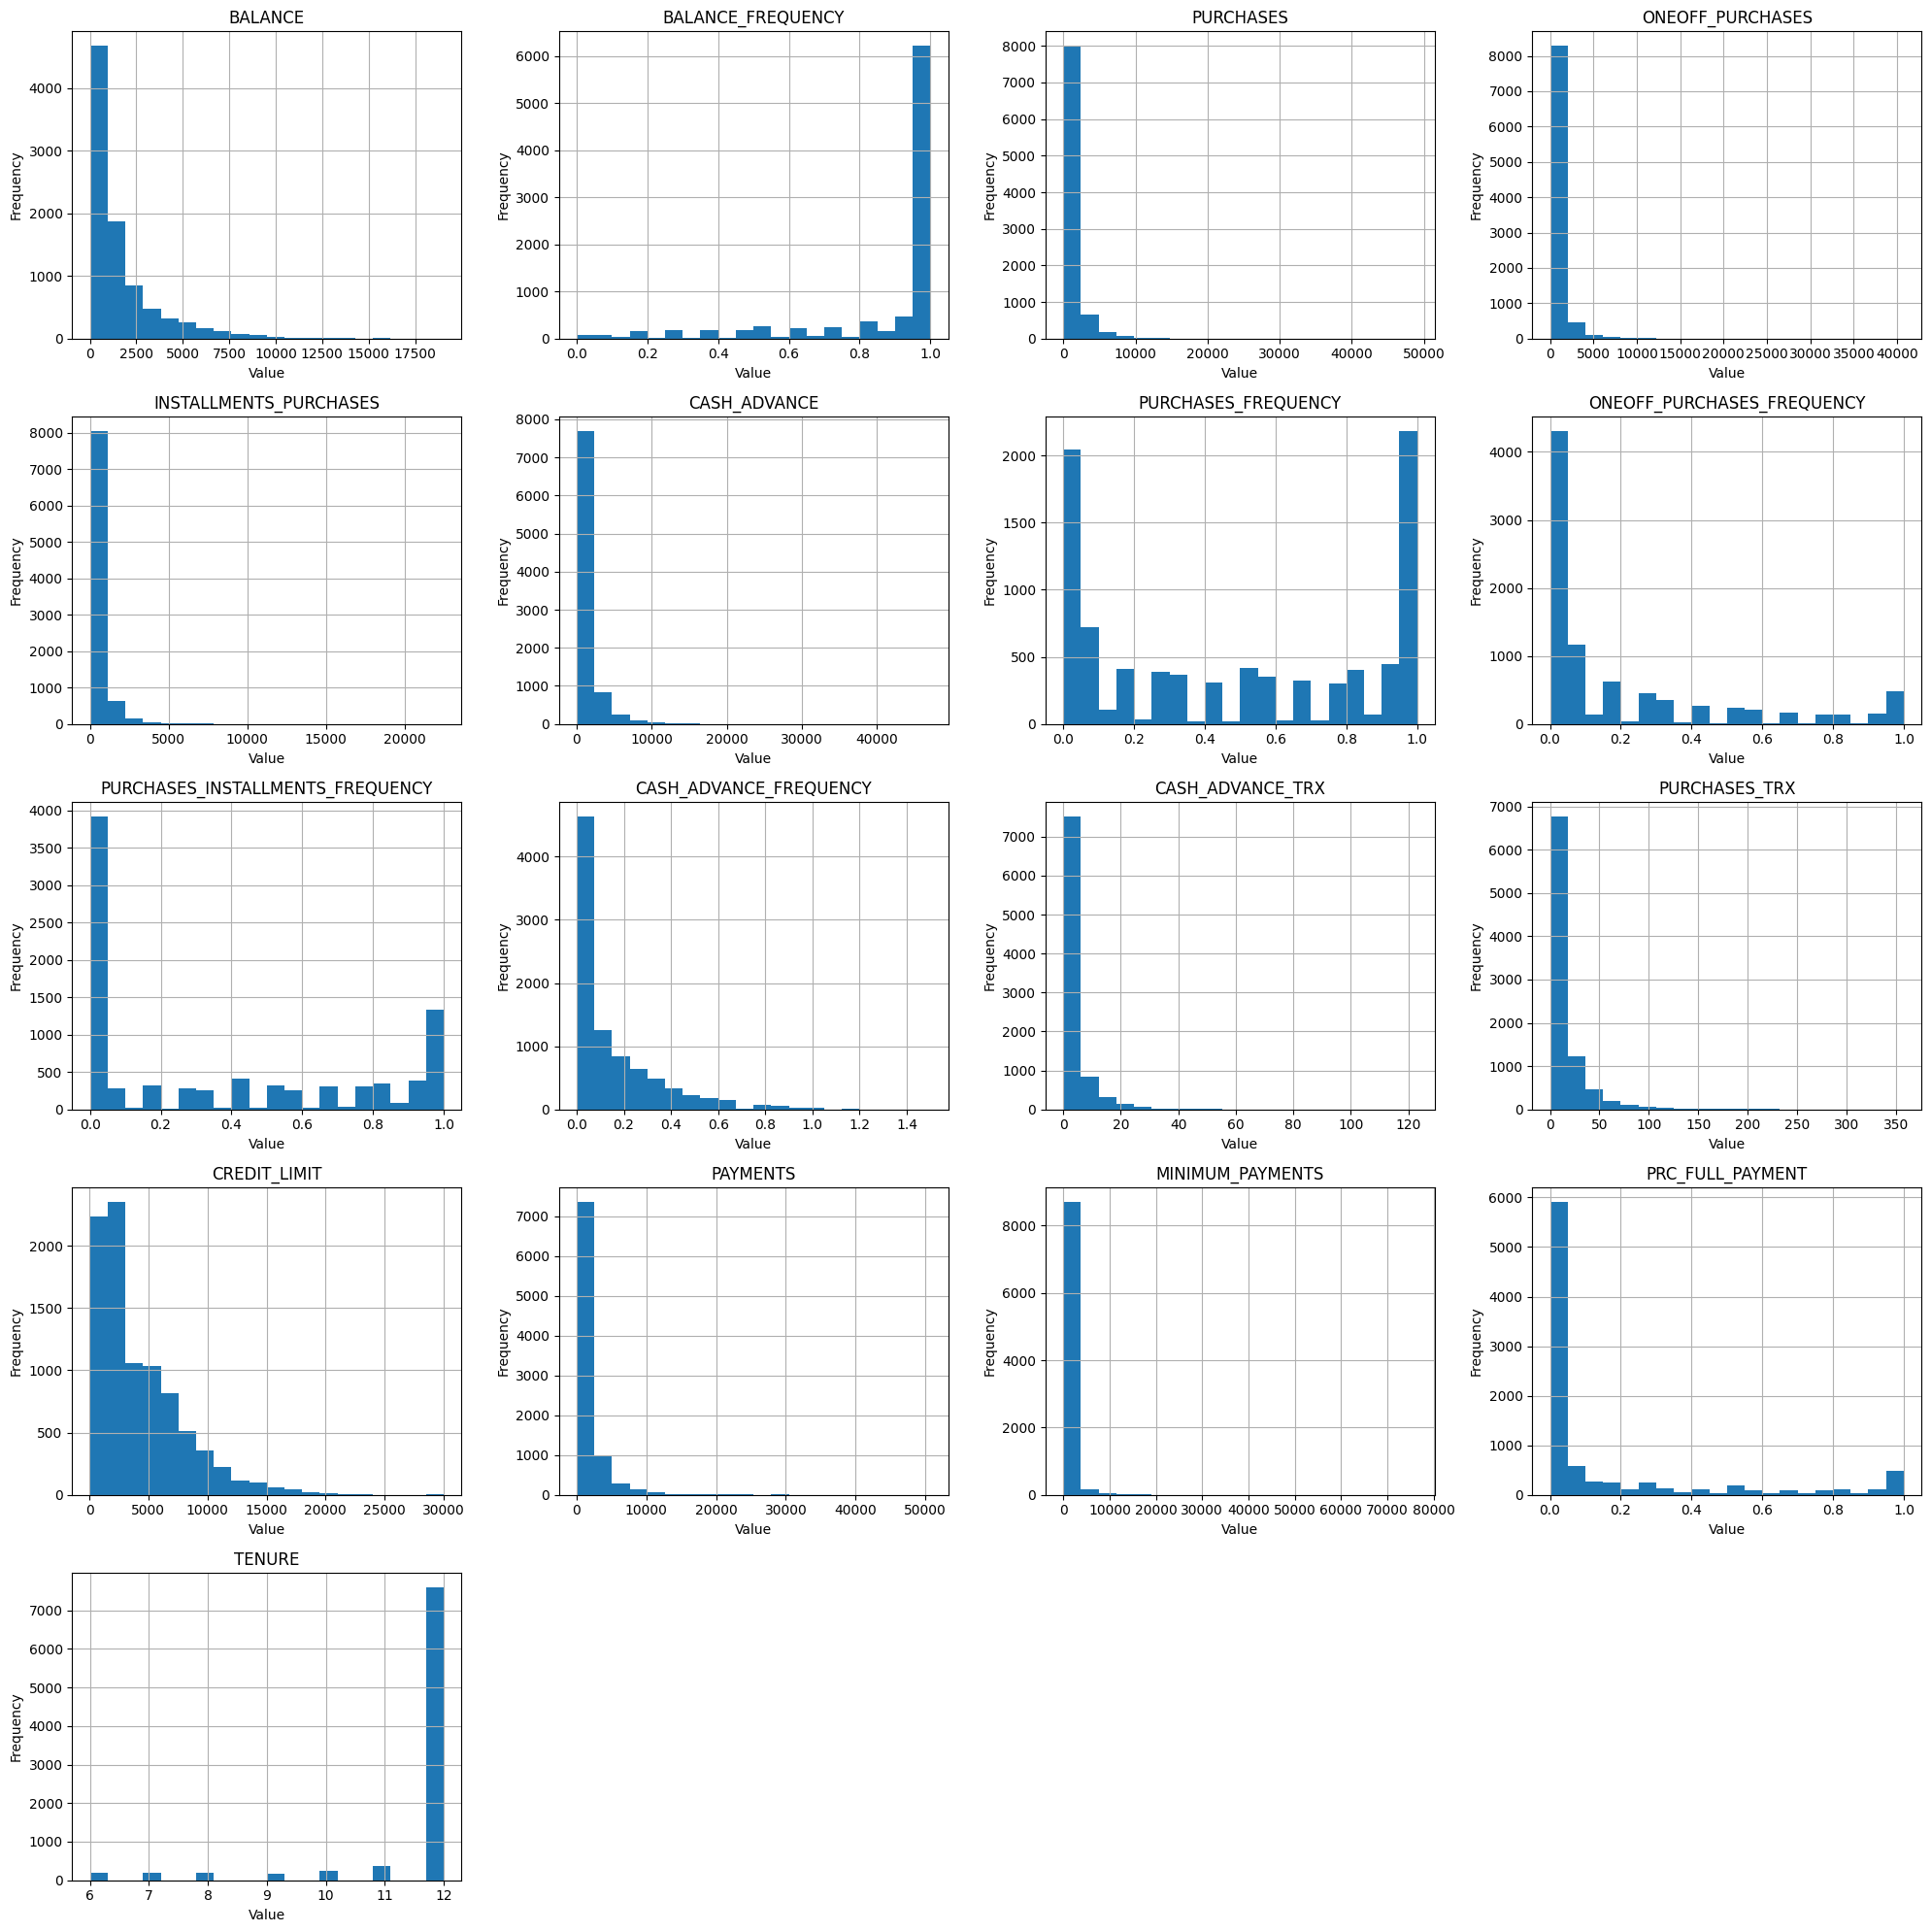

In [58]:
import matplotlib.pyplot as plt

# Plotting histograms for each variable
plt.figure(figsize=(20, 20))
for i, column in enumerate(data.columns, 1):
    plt.subplot(5, 4, i)
    data[column].hist(bins=20)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

1. **Balance:** A significant number of customers have low balances, suggesting either frequent usage or payment of their credit card bills.
2. **Balance Frequency:** Most customers seem to update their balance regularly, indicating active account management.
3. **Purchases:** A large portion of customers make relatively small purchases, with fewer customers making high-value purchases.
4. **One-Off Purchases:** Similar to the overall purchases, most one-off purchases are small, but there are customers who make substantial one-off purchases.
5. **Installments Purchases:** Many customers appear to prefer installment purchases, possibly for managing their cash flows or for large purchases.
6. **Cash Advance:** The majority of customers seem to use little to no cash advance feature, which could imply a preference for direct card purchases.
7. **Purchases Frequency:** There's a wide distribution in purchase frequency, with many customers making purchases quite frequently.
8. **One-Off Purchases Frequency:** A significant number of customers rarely make one-off purchases, whereas some do it quite frequently.
9. **Purchases Installments Frequency:** Many customers use installment options regularly, indicating a preference for spreading out payments.
10. **Cash Advance Frequency:** Most customers rarely take cash advances, aligning with the low usage of cash advance amounts.
11. **Cash Advance Transactions (Cash Advance TRX):** Corresponds with the cash advance amount, showing that most customers rarely engage in these transactions.
12. **Purchases Transactions (Purchases TRX):** There's a wide range in the number of purchase transactions, with many customers engaging in multiple transactions.
13. **Credit Limit:** The distribution of credit limits shows a range, with many customers having moderate to high credit limits.
14. **Payments:** Payment amounts vary widely among customers, reflecting differences in card usage, balance, and financial behavior.
15. **Minimum Payments:** The majority of customers have relatively low minimum payments, though there is variation.
16. **Percentage of Full Payment (PRC_FULL_PAYMENT):** Most customers do not pay their balance in full, which may indicate revolving credit behavior.
17. **Tenure:** Most customers have a long tenure with their credit cards, suggesting loyalty or satisfaction with the card services.

## Section (b) Visualizing Correlation between the Features
(b) Compute the Pearson’s correlation between all pairs of
variables 2-18 (i.e., all variables except from the customer ID). Assign the resulting correlation values in a 17x17 matrix C, whose (i; j) element represents the correlation value between
variables i and j, i.e., C(i; j) = corr(i; j). Visualize the resulting matrix C with a heatmap
and discuss potential associations between the considered variables. Note: You can use the
‘heatmap’ function from ‘seaborn’

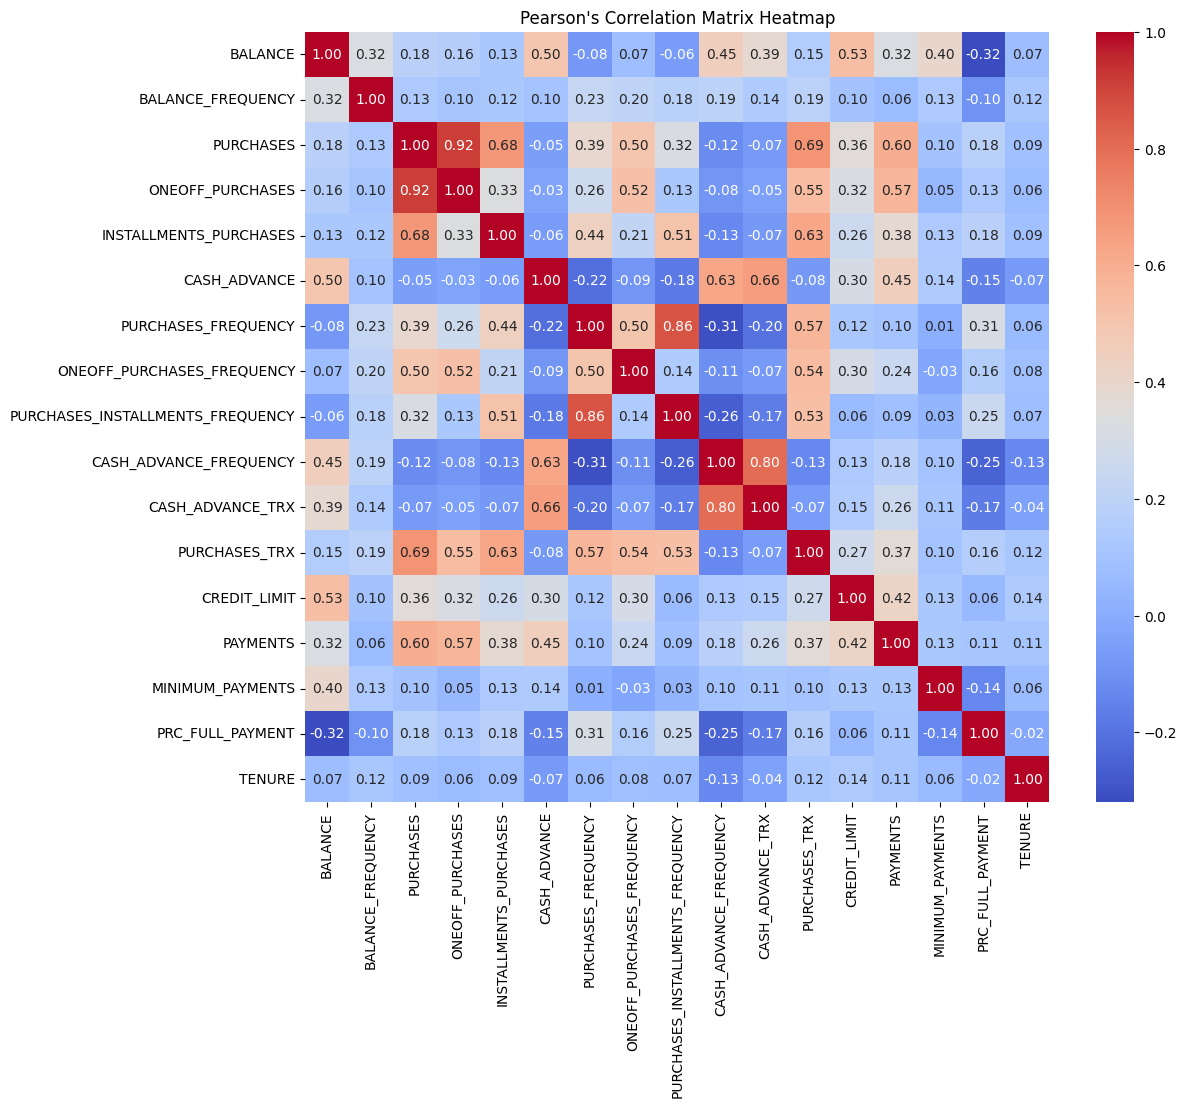

In [59]:
import seaborn as sns

# Calculating the Pearson's correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson's Correlation Matrix Heatmap")
plt.show()


## Some key observations about the correlation plot:




In [60]:
# Identifying very high positive correlations
# let us define "very high" as a correlation coefficient greater than 0.75 (excluding 1)
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_positive_correlations = high_corr_pairs[(high_corr_pairs > 0.75) & (high_corr_pairs < 1)]

high_positive_correlations

PURCHASES                         ONEOFF_PURCHASES                    0.916844
ONEOFF_PURCHASES                  PURCHASES                           0.916844
PURCHASES_FREQUENCY               PURCHASES_INSTALLMENTS_FREQUENCY    0.862921
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY                 0.862921
CASH_ADVANCE_TRX                  CASH_ADVANCE_FREQUENCY              0.799573
CASH_ADVANCE_FREQUENCY            CASH_ADVANCE_TRX                    0.799573
dtype: float64

#### Table - High Positive Correlation Features
| Variable 1                              | Variable 2                              | Correlation Coefficient |
|-----------------------------------------|-----------------------------------------|-------------------------|
| ONEOFF_PURCHASES                  | PURCHASES                                | 0.916844|
| PURCHASES_FREQUENCY               | PURCHASES_INSTALLMENTS_FREQUENCY         | 0.862921|
| CASH_ADVANCE_TRX                  | CASH_ADVANCE_FREQUENCY                   | 0.799573|


#### Normalization of Data:

In [61]:
from sklearn.preprocessing import StandardScaler

dataset = data.iloc[:,:15].copy()
# StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale.
scaler=StandardScaler()
dataset_normalized=scaler.fit_transform(dataset.iloc[:,:15])
dataset_normalized_df = pd.DataFrame(dataset_normalized, columns=dataset.columns)
dataset_selected = dataset_normalized_df

# Section (c) K-means Clustering
Use the K-Means clustering algorithm to cluster participants based on variables 2-16. Experiment with different number of clusters K and use the elbow method to identify the optimal number of clusters K* based on the data. Using K*, report the number of users that were assigned to each cluster, the centroid of each cluster (i.e., average value of each feature per cluster), and the scatter of each cluster (i.e., average distance of each sample of the cluster to the cluster centroid). Discuss your findings in association to users’ percent of full payment (variable 17) and tenure of credit card service (variable 18). Note: You can use the sklearn.cluster.KMeans function. Consider feature normalization to avoid artificially assigning higher importance to features of a larger range.

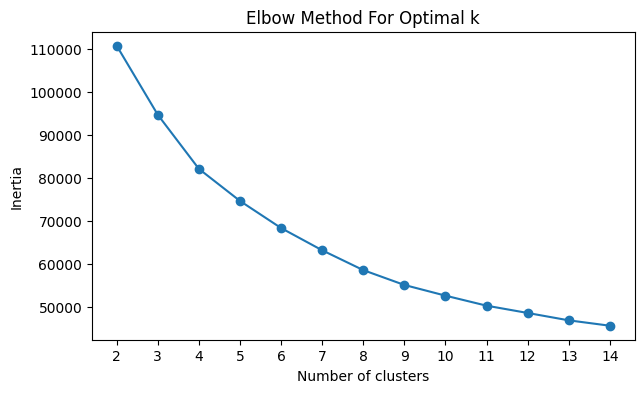

Silhouette score for 5 clusters k-means : 0.229 
Silhouette score for 6 clusters k-means : 0.247 
Silhouette score for 7 clusters k-means : 0.256 
Silhouette score for 8 clusters k-means : 0.263 
Silhouette score for 9 clusters k-means : 0.258 
Silhouette score for 10 clusters k-means : 0.255 


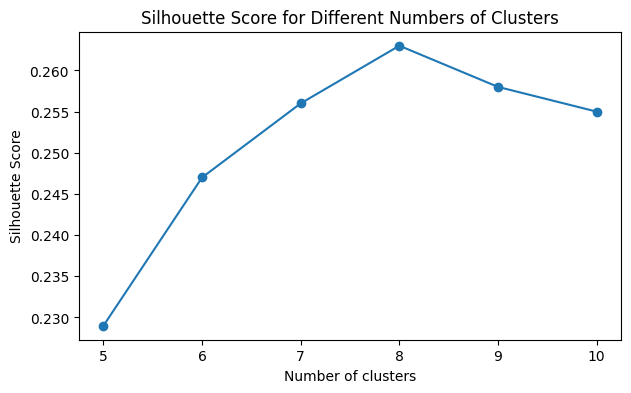

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')


# Using the elbow method to find the optimal number of clusters
inertia = []
silhouette_scores = []
K_range = range(2, 15)
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=123)
    kmeans.fit(dataset_selected)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(7, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.show()

K_range = range(5,11)
for i in K_range:
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(dataset_selected)
    score = silhouette_score(dataset_selected,kmeans_labels, metric='euclidean').round(3)
    silhouette_scores.append(score)
    print("Silhouette score for {} clusters k-means : {} ".format(i,score))
    
# Plotting the silhouette scores
plt.figure(figsize=(7, 4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.show()

In [63]:
from sklearn.metrics import davies_bouldin_score
for i in [6,7,8]:
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(dataset_selected)
    print('Davies Bouldin Score:'+str(davies_bouldin_score(dataset_selected,kmeans_labels).round(3)))

Davies Bouldin Score:1.326
Davies Bouldin Score:1.292
Davies Bouldin Score:1.219


### Metrics Score Comparison for determining opimal K*

Comparison of the three metrics for cluster number 6, 7, 8 is analyzed in the table below:

|Number of Clusters| Davies Bouldin Score |    Silhoutte Score |                             
|------------------|----------------------|--------------------|
|        6         |      1.326           |     0.247          |               
|        7         |     1.292            |     0.256          |
|        8         |      1.219           |     0.263          |

As we can see above in the table although silhoutte scores are very close to each other from the Davies Bouldin Score we can see that 8 clusters has the lowest score hence we can choose K* to be 8

In [64]:
# Running KMeans on the optimal K value
optimal_K = 8
kmeans_labels=KMeans(n_clusters=optimal_K,random_state=123).fit_predict(dataset_selected)

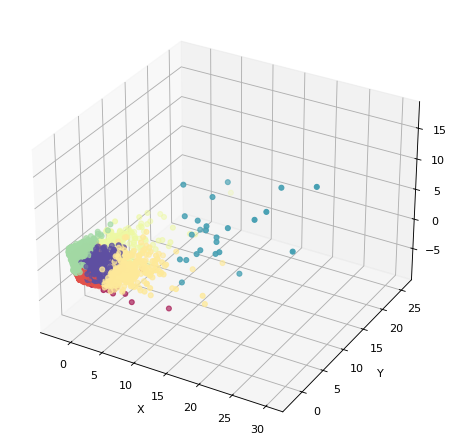

In [65]:

from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3).fit_transform(dataset_selected)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

### Visualization: Number of Users per Cluster & The scatter of each cluster

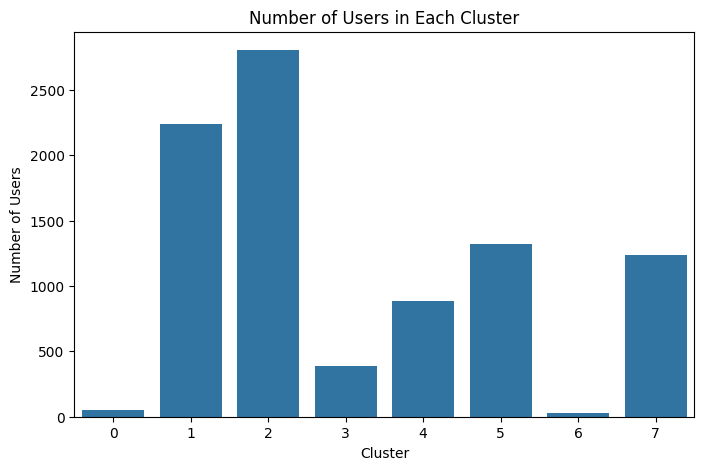

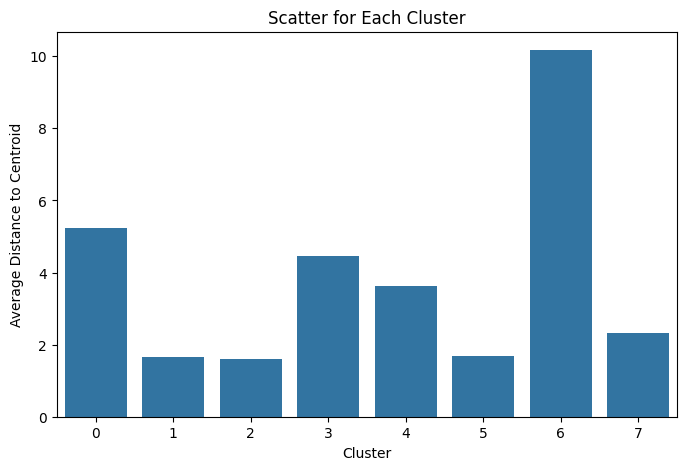

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,3874.347938,0.988216,738.477778,101.711296,636.766481,...,2.981481,15.648148,4111.111111,1386.179670,23026.762059
1,766.471157,0.951633,861.333919,168.250031,693.617078,...,0.821269,17.941466,3345.146731,1030.143238,589.513985
2,1561.403177,0.966707,202.240446,165.063959,37.335673,...,3.334880,2.193859,3265.910984,980.963654,683.848516
3,3520.673031,0.987913,6174.442591,3626.676088,2549.320907,...,2.113990,89.867876,9095.466321,5767.339783,1609.432626
4,4962.750150,0.966486,522.589718,326.780339,195.924260,...,16.318644,7.847458,8152.999486,4027.579699,1699.666391
5,117.248178,0.378228,331.046079,204.174784,127.095973,...,0.775170,4.058289,3718.311464,1089.063432,179.995623
6,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,...,2.400000,123.320000,16360.000000,27159.043527,3201.825604
7,1343.241811,0.968934,2005.160065,1593.277974,411.921638,...,1.125101,27.790153,5905.915328,1997.905488,516.867145


In [66]:
# Importing necessary libraries since the code execution state was reset
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KMeans with the optimal number of clusters determined to be 8
kmeans_optimal = KMeans(n_clusters=optimal_K, random_state=123)
kmeans_optimal.fit(dataset_selected)

# Cluster labels
labels = kmeans_optimal.labels_

# Number of users in each cluster
clusters_counts = pd.Series(labels).value_counts().sort_index()

# Scatter (average distance) of each cluster
scatter = [np.mean(np.sqrt(np.sum((dataset_selected[labels == i] - kmeans_optimal.cluster_centers_[i]) ** 2, axis=1))) for i in range(optimal_K)]

# Visualizing the number of users in each cluster
plt.figure(figsize=(8, 5))
sns.countplot(x=labels)
plt.title('Number of Users in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.xticks(range(0,8))
plt.show()

# Visualizing the scatter (average distance) for each cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=np.arange(optimal_K), y=scatter)
plt.title('Scatter for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Distance to Centroid')
plt.show()

# Since centroids are in a multidimensional array, converting it to a DataFrame for better visualization
centroids = scaler.inverse_transform(kmeans_optimal.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=dataset_selected.columns)
centroids_df

### Association of Clusters with users’ percent of full payment  and tenure of credit card service

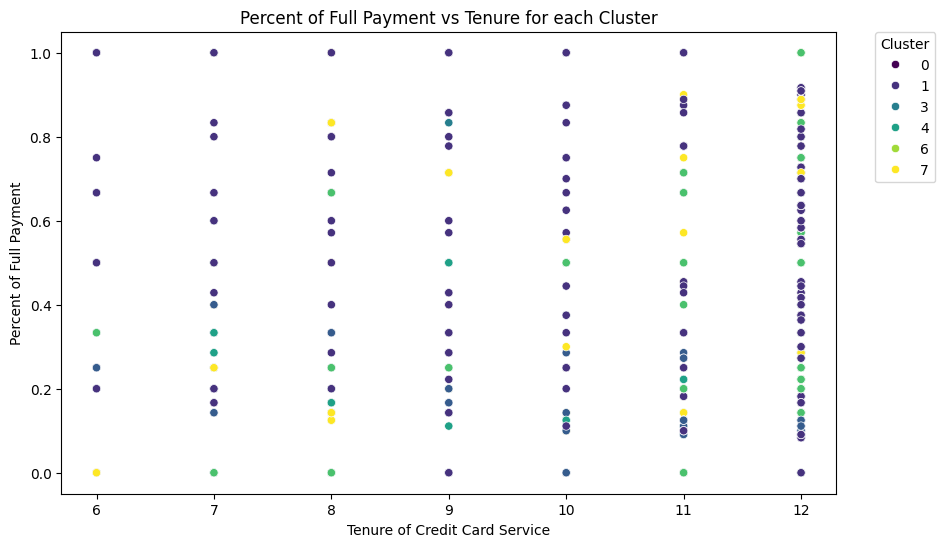

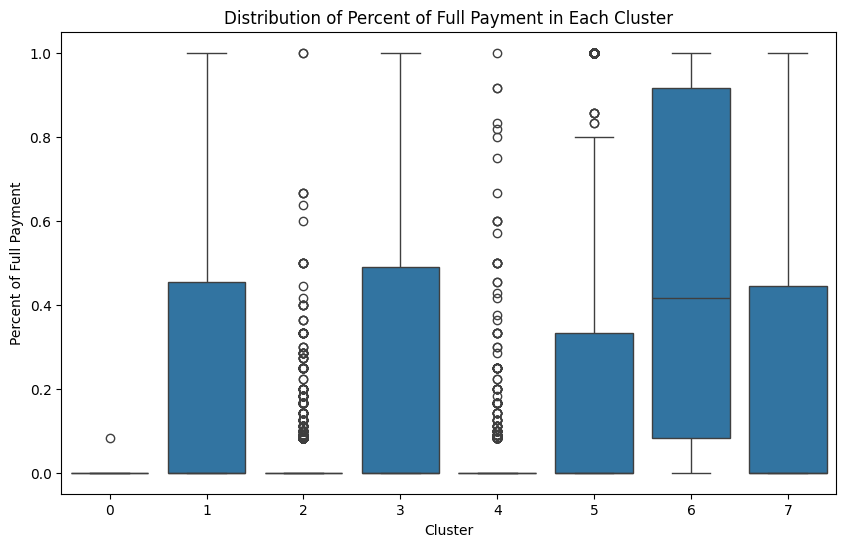

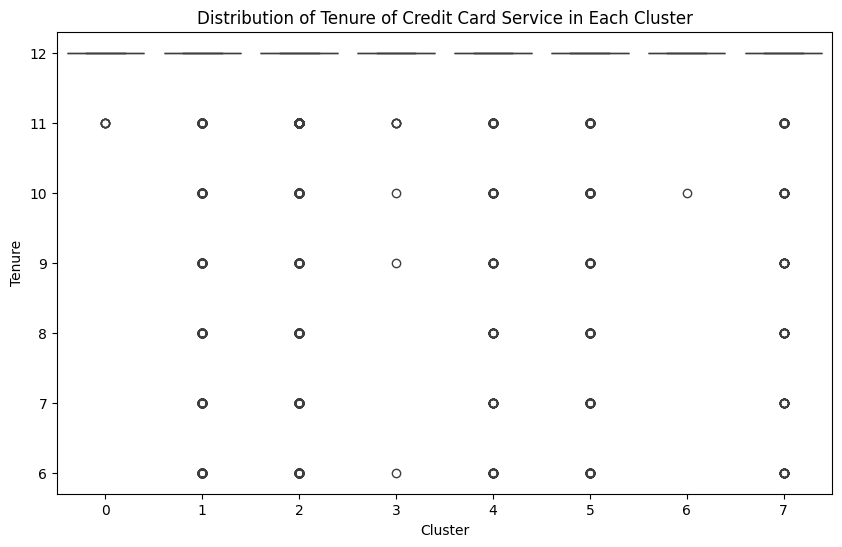

In [67]:
dataset_visualization = data.copy()
dataset_visualization['Cluster'] = labels
dataset_visualization.head()

# Scatter Plot for Percent of Full Payment vs Tenure, colored by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_visualization, x='TENURE', y='PRC_FULL_PAYMENT', hue='Cluster', palette='viridis')
plt.title('Percent of Full Payment vs Tenure for each Cluster')
plt.xlabel('Tenure of Credit Card Service')
plt.ylabel('Percent of Full Payment')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Box Plot for Percent of Full Payment for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_visualization, x='Cluster', y='PRC_FULL_PAYMENT')
plt.title('Distribution of Percent of Full Payment in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percent of Full Payment')
plt.show()

# Box Plot for Tenure of Credit Card Service for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_visualization, x='Cluster', y='TENURE')
plt.title('Distribution of Tenure of Credit Card Service in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Tenure')
plt.show()

In [68]:
data.describe().T[-2:]

,count,mean,std,min,25%,50%,75%,max
PRC_FULL_PAYMENT,8949.0,0.153732,0.292511,0.0,0.0,0.0,0.142857,1.0
TENURE,8949.0,11.517935,1.337134,6.0,12.0,12.0,12.000000,12.0


The implications of of the above Box Plots are as follows:

#### Percentage of Full Payment:
The box plot for the distribution of the percent of full payment across clusters suggests variability in how different clusters manage their credit card payments. Here are some implications based on this plot in conjunction with the descriptive statistics :

``Variable Full Payment Behavior:`` Different clusters show varying median values for the percent of full payment. This indicates that some clusters tend to pay off their credit card balance in full more often than others. For example, cluster 3 has a higher median percent of full payment compared to cluster 1.

``Outliers and Variability:`` There are several outliers in almost all clusters, suggesting that within each cluster, there are customers who deviate significantly from the median behavior of that cluster. This could represent a mix of users with very high or very low percentages of full payment within the same segment.

``Range of Payment Behaviors:`` The interquartile range (IQR), which is the range between the 25th percentile (bottom of the box) and the 75th percentile (top of the box), varies across clusters. A larger IQR (as seen in clusters 3 and 5) indicates a wider range of payment behaviors within that cluster.

``Clusters with High and Low Full Payment Percentages:`` Some clusters have a higher median percent of full payment, which might suggest these users are more financially disciplined or have more disposable income to pay off their balances. On the other hand, clusters with a lower median may indicate users who are either unable or choose not to pay off their balances in full.

#### Tenure: 
``Tenure is not a differentiator:`` Since the majority of the customers are at the maximum tenure, this variable won't be useful for distinguishing between different customer behaviors or segments.

``Stable Customer Base:`` The customer base appears to be quite stable, with most customers staying with the service for the maximum recorded tenure.

``Limited Variability:`` The variability in tenure is confined to the lower end since the standard deviation is relatively small and the majority are at the maximum tenure.

## Section (d) Finding optimal K using different feature combinations
(d) Repeat question (c) using a different combination of
features at the input of K-Means, informed by your findings in questions (a) and (b). Please
discuss your findings. Note: Consider removing highly skewed features and/or keeping features
that are not correlated with each other.

In [69]:
data.skew()

BALANCE                              2.393270
BALANCE_FREQUENCY                   -2.024193
PURCHASES                            8.143969
ONEOFF_PURCHASES                    10.044622
INSTALLMENTS_PURCHASES               7.298823
CASH_ADVANCE                         5.166323
PURCHASES_FREQUENCY                  0.059970
ONEOFF_PURCHASES_FREQUENCY           1.535453
PURCHASES_INSTALLMENTS_FREQUENCY     0.509023
CASH_ADVANCE_FREQUENCY               1.828644
CASH_ADVANCE_TRX                     5.720976
PURCHASES_TRX                        4.630493
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907465
MINIMUM_PAYMENTS                    13.851853
PRC_FULL_PAYMENT                     1.942641
TENURE                              -2.944788
dtype: float64

### Revisiting the features:

If we analyze the correlation matrix in section b and the data skewness in the above cell we can remove the following set of features listed below:(considering a threshold of 4 for skewness and 0.75 for correlation score)
1. ONEOFF_PURCHASES (Highly Skewed)
2. Purchases (Highly Skewed)
3. Minimum Payments (Highly Skewed)
4. Payments
5. Cash Advance
6. Cash Advance TRX
7. Installment Purchases
8. Purchase TRX

In [70]:
features_to_drop = ['ONEOFF_PURCHASES','PURCHASES','MINIMUM_PAYMENTS','PURCHASES_INSTALLMENTS_FREQUENCY','PAYMENTS','CASH_ADVANCE','CASH_ADVANCE_TRX', 'INSTALLMENTS_PURCHASES','PURCHASES_TRX']

data_selected = dataset_selected.drop(columns=features_to_drop)
data_selected.shape

(8949, 6)

In the following cells we will use the above 6 features in the data to find the optimal K* value. We will be using 3 metric methods which are elbow, silhoutte and Davies Bouldin Score. 

**Elbow Method:** A technique used to determine the optimal number of clusters in K-means clustering. It involves plotting the sum of squared distances of samples to their nearest cluster center and looking for the 'elbow' point where the rate of decrease sharply changes. This point indicates a suitable number of clusters.

**Silhouette Score:** Measures how similar a data point is to its own cluster compared to other clusters. A high value indicates better-defined clusters. It ranges from -1 (incorrect clustering) to +1 (highly dense clustering).

**Davies-Bouldin Score:** Evaluates clustering algorithms by comparing within-cluster similarity to between-cluster separation. Lower values indicate better clustering, with 0 being the lowest possible score.

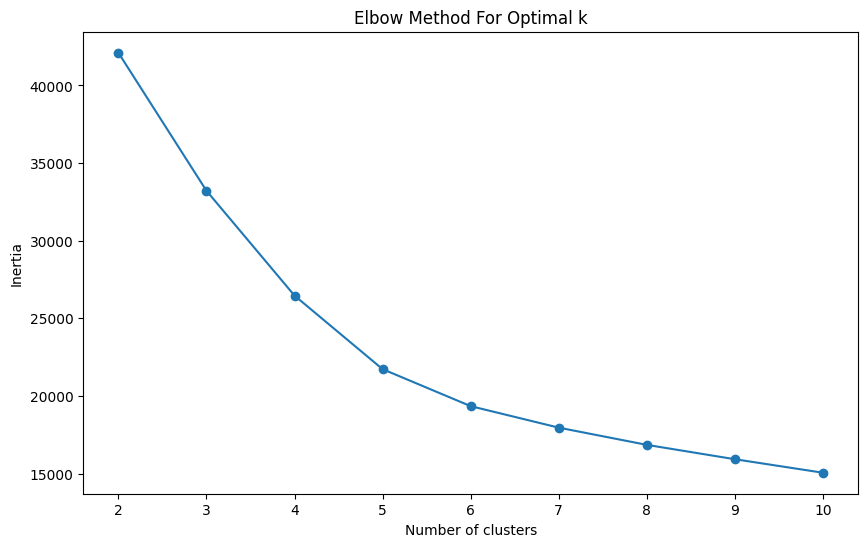

Silhouette score for 5 clusters k-means : 0.307 
Silhouette score for 6 clusters k-means : 0.307 
Silhouette score for 7 clusters k-means : 0.31 
Silhouette score for 8 clusters k-means : 0.312 
Silhouette score for 9 clusters k-means : 0.3 
Silhouette score for 10 clusters k-means : 0.289 


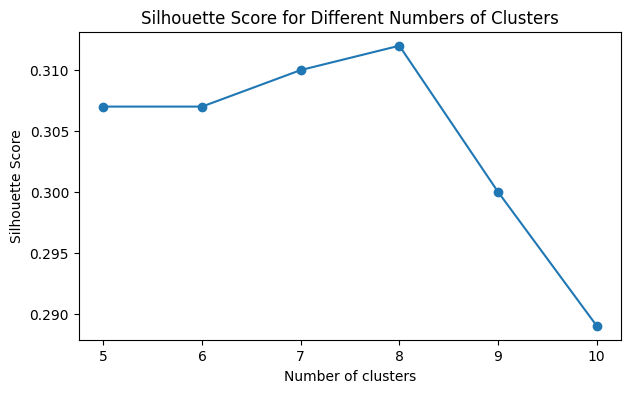

In [71]:
# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
K_range = range(2, 11)
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=123)
    kmeans.fit(data_selected)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.show()

K_range = range(5,11)
for i in K_range:
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(data_selected)
    score = silhouette_score(data_selected,kmeans_labels, metric='euclidean').round(3)
    silhouette_scores.append(score)
    print("Silhouette score for {} clusters k-means : {} ".format(i,score))
    
# Plotting the silhouette scores
plt.figure(figsize=(7, 4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.show()

From the above graph we see that 6,7 and 8 has very close values of silhouttee score.

In [72]:
from sklearn.metrics import davies_bouldin_score
for i in [6,7,8]:
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(data_selected)
    print('Davies Bouldin Score:'+str(davies_bouldin_score(data_selected,kmeans_labels).round(3)))

Davies Bouldin Score:1.13
Davies Bouldin Score:1.163
Davies Bouldin Score:1.211


### Metrics Score Comparison for determining opimal K*

Comparison of the three metrics for cluster number 6, 7, 8 is analyzed in the table below:

|Number of Clusters| Davies Bouldin Score |    Silhoutte Score |                             
|------------------|----------------------|--------------------|
|        6         |      1.13            |     0.307          |               
|        7         |      1.163           |     0.31           |
|        8         |      1.211           |     0.312          |

As we can see above in the table although silhoutte scores are very close to each other from the Davies Bouldin Score we can see that 6 clusters has the lowest score hence we can choose K* to be 6

In [73]:
optimal_K = 6

### Visualization: Number of Users per Cluster & The scatter of each cluster

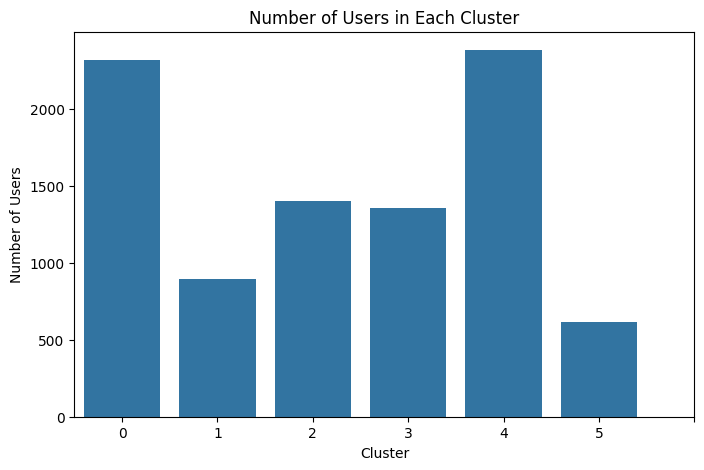

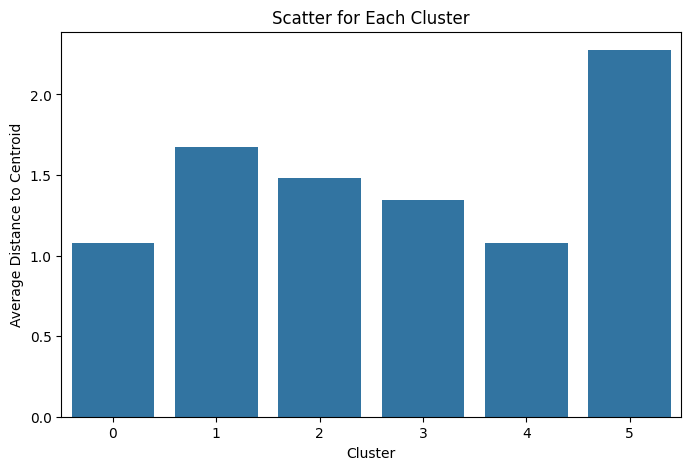

In [74]:
# Importing necessary libraries since the code execution state was reset
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KMeans with the optimal number of clusters determined to be 8
kmeans_optimal = KMeans(n_clusters=optimal_K, random_state=123)
kmeans_optimal.fit(data_selected)

# Cluster labels
labels = kmeans_optimal.labels_

# Number of users in each cluster
clusters_counts = pd.Series(labels).value_counts().sort_index()

# Scatter (average distance) of each cluster
scatter = [np.mean(np.sqrt(np.sum((data_selected[labels == i] - kmeans_optimal.cluster_centers_[i]) ** 2, axis=1))) for i in range(optimal_K)]

# Visualizing the number of users in each cluster
plt.figure(figsize=(8, 5))
sns.countplot(x=labels)
plt.title('Number of Users in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.xticks(range(0,7))
plt.show()

# Visualizing the scatter (average distance) for each cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=np.arange(optimal_K), y=scatter)
plt.title('Scatter for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Distance to Centroid')
plt.show()

### Association of Clusters with users’ percent of full payment  and tenure of credit card service

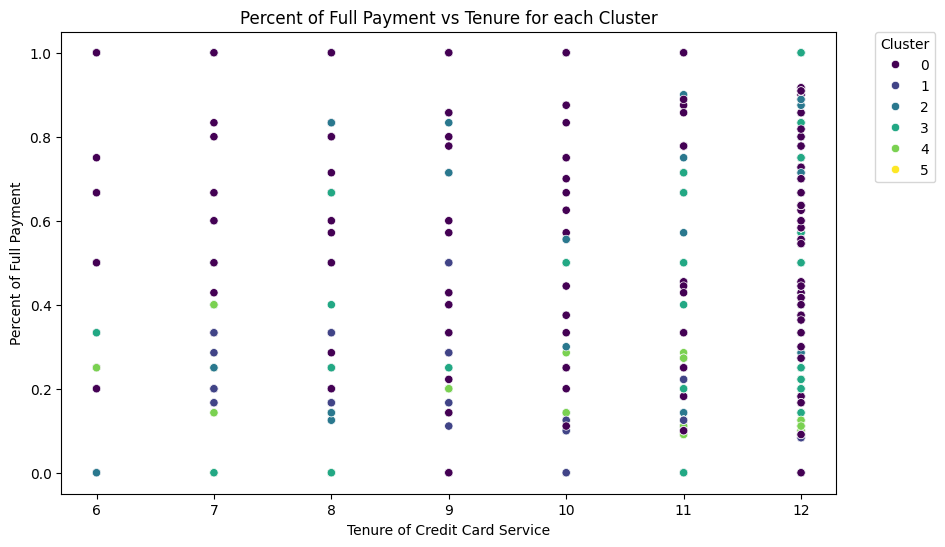

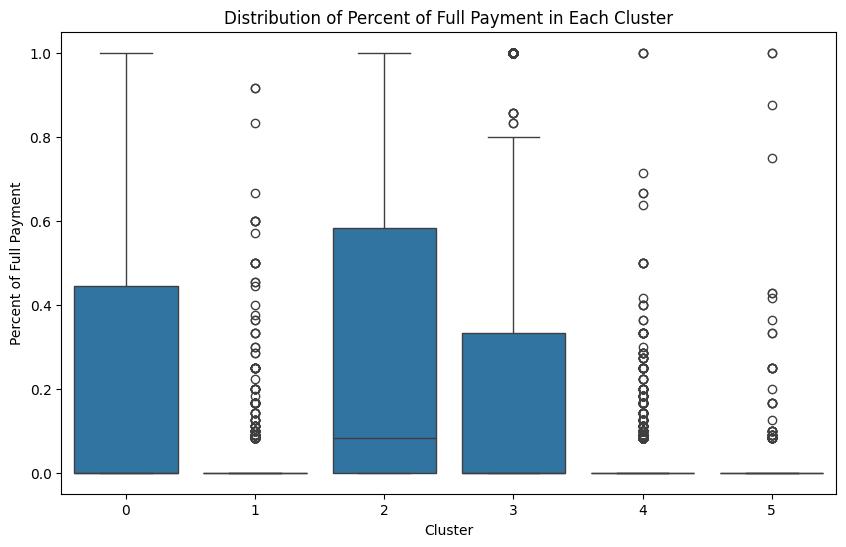

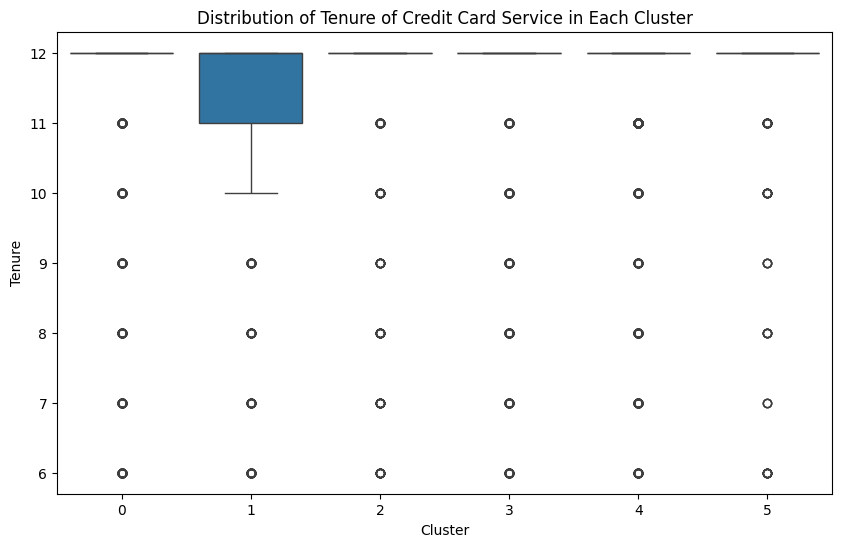

In [75]:
dataset_visualization = data.copy()
dataset_visualization['Cluster'] = labels
dataset_visualization.head()

# Scatter Plot for Percent of Full Payment vs Tenure, colored by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_visualization, x='TENURE', y='PRC_FULL_PAYMENT', hue='Cluster', palette='viridis')
plt.title('Percent of Full Payment vs Tenure for each Cluster')
plt.xlabel('Tenure of Credit Card Service')
plt.ylabel('Percent of Full Payment')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Box Plot for Percent of Full Payment for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_visualization, x='Cluster', y='PRC_FULL_PAYMENT')
plt.title('Distribution of Percent of Full Payment in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percent of Full Payment')
plt.show()

# Box Plot for Tenure of Credit Card Service for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_visualization, x='Cluster', y='TENURE')
plt.title('Distribution of Tenure of Credit Card Service in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Tenure')
plt.show()

### Visualisation using Dimensionality reduction using PCA(3D)

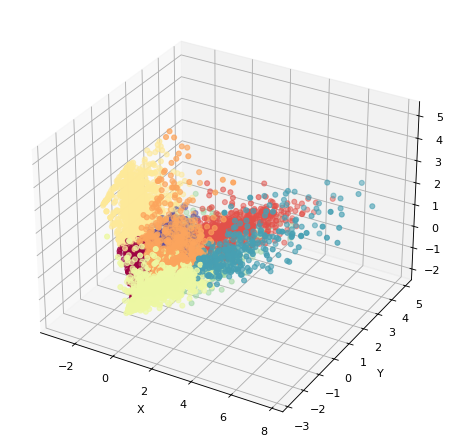

In [76]:

from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3).fit_transform(data_selected)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

## Section (e) Gaussian Mixture Models
(e) Gaussian mixture models. Use the Gaussian Mixture Models (GMMs) to cluster participants based on the subset of variables that you have identified from ques- tion (d). The number of Gaussian mixtures can be approximately equal to the optimal num- ber of clusters K* found by (d). Report the mean vector and covariance matrix for each Gaussian and discuss your findings. Compute the log-likelihood of each sample belonging to the GMM. Plot and discuss the histogram of the resulting log-likelihood values. Note: You can use the sklearn.mixture.GaussianMixture function to conduct the GMM clustering and the sklearn.mixture.score samples to compute the log-likelihood of each data sample. You can use a heatmap to visualize the covariance matrices of the GMM, instead of printing their actual values.

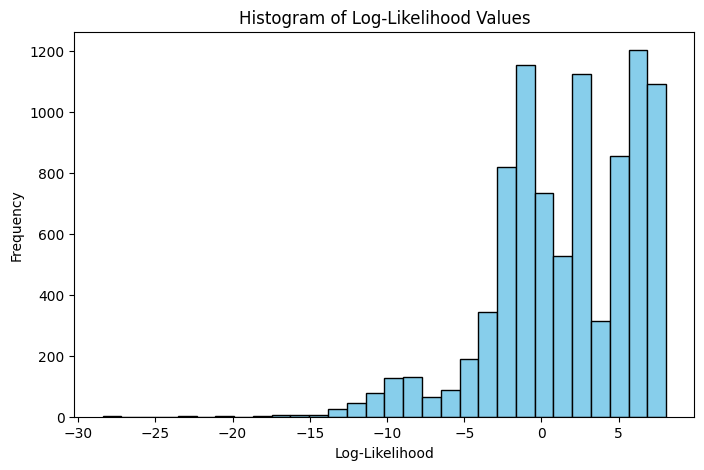

,Gaussian Component,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT
0,0,-0.278051,0.517980,0.692235,0.405838,-0.675294,-0.024165
1,1,-0.739884,-1.646315,-0.032294,-0.574091,-0.675294,-0.424665
2,2,-0.022787,-0.082228,-1.189844,-0.635554,0.503610,-0.378516
3,3,-0.630287,-0.855273,0.074665,0.312637,-0.675294,0.291471
4,4,0.966046,0.517980,0.158314,0.203616,0.873146,0.481308
5,5,-0.102187,-0.466783,0.204166,0.210334,0.575212,0.156599


In [77]:
from sklearn.mixture import GaussianMixture

# Since the optimal number of clusters K* is 4 from the previous K-Means analysis
# We'll use this to set the number of components for GMM
gmm=GaussianMixture(n_components=6,random_state=123)

# Fit the GMM model
gmm.fit(data_selected)

# The mean vector for each Gaussian
means = gmm.means_

# The covariance matrix for each Gaussian
covariances = gmm.covariances_

# Compute the log-likelihood of each sample
log_likelihood = gmm.score_samples(data_selected)

# Plot the histogram of the resulting log-likelihood values
plt.figure(figsize=(8, 5))
plt.hist(log_likelihood, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Log-Likelihood Values')
plt.xlabel('Log-Likelihood')
plt.ylabel('Frequency')
plt.show()

# Creating a DataFrame for mean vectors for better visualization
means_df = pd.DataFrame(means, columns=data_selected.columns)
means_df.index.name = 'Gaussian Component'
means_df.reset_index(inplace=True)

# Display the mean vectors in a more structured format
means_df

### Analysis of Gaussian Components based on above mean values of features:

Each component reflects different customer behaviors regarding credit card usage. Components 0 and 4 seem to be more engaged with their accounts, either through frequent purchases or cash advances, and have higher credit limits. Components 1 and 3 are characterized by lower engagement, with component 1 having particularly low balance frequency and credit limits. Component 2 stands out for taking cash advances despite low purchases frequency, possibly indicating a specific financial behavior or need. Component 5 seems to be moderately active with a tendency towards more cash advance usage.

### Analysis of the Histogram of Log-Likelihood Graph

Here are some observations and insights from the graph:

1. ``Distribution Shape:`` The histogram appears to be normally distributed, which is a good sign that the GMM is adequately capturing the underlying distribution of the data. This is because the log-likelihood values indicate how probable each data point is under the model, and a normal distribution of these values suggests that the model has good generality across the dataset.

2. ``Range of Log-Likelihood Values:`` The log-likelihood values range from around -30 to 5. Most values are clustered between -5 and 5, indicating that for most of the data, the model has a moderate to high confidence in its predictions.

3. ``Possible Outliers:`` The presence of values towards the extremes (especially the negative side) may indicate potential outliers or anomalies in the data, or regions where the model does not fit as well. This could be explored further by examining the corresponding data points to see if they are indeed outliers or if they represent a rare but valid structure in the data.

4. ``Model Fit:`` There's a noticeable peak towards the higher end of the log-likelihood range. A peak in the positive range suggests that there's a significant portion of the dataset that fits very well with the Gaussian components that the model has learned.

5. ``Skewness:`` There is a slight left skew in the histogram, suggesting there are more data points that the model fits less confidently (lower log-likelihood). Investigating why these samples have lower probabilities could offer insights into the model's performance and whether the number of components or the model parameters need adjusting.




In [78]:
covariances = gmm.covariances_
covariance_dfs = [pd.DataFrame(cov, columns=data_selected.columns, index=data_selected.columns) for cov in covariances]
# Set display options to show more rows/columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 10)
for i, cov_dfs in enumerate(covariance_dfs):
    print(f"Covariance Report for cluster {i}")
    print(cov_dfs)

Covariance Report for cluster 0
                                 BALANCE  BALANCE_FREQUENCY  \
BALANCE                     2.944074e-01      -1.119640e-31   
BALANCE_FREQUENCY          -1.147492e-31       1.000000e-06   
PURCHASES_FREQUENCY        -4.132575e-02       4.102563e-31   
ONEOFF_PURCHASES_FREQUENCY  1.124046e-01       1.882779e-31   
CASH_ADVANCE_FREQUENCY      1.147492e-31      -3.081488e-31   
CREDIT_LIMIT                1.440768e-01       1.002663e-32   

                            PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
BALANCE                           -4.132575e-02                1.124046e-01   
BALANCE_FREQUENCY                  4.147126e-31                1.715668e-31   
PURCHASES_FREQUENCY                5.887807e-01                2.831148e-01   
ONEOFF_PURCHASES_FREQUENCY         2.831148e-01                1.486871e+00   
CASH_ADVANCE_FREQUENCY            -4.147126e-31               -1.715668e-31   
CREDIT_LIMIT                       1.165282e-01     

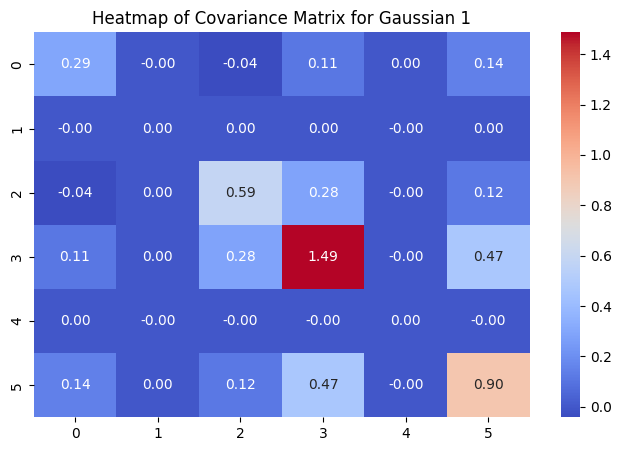

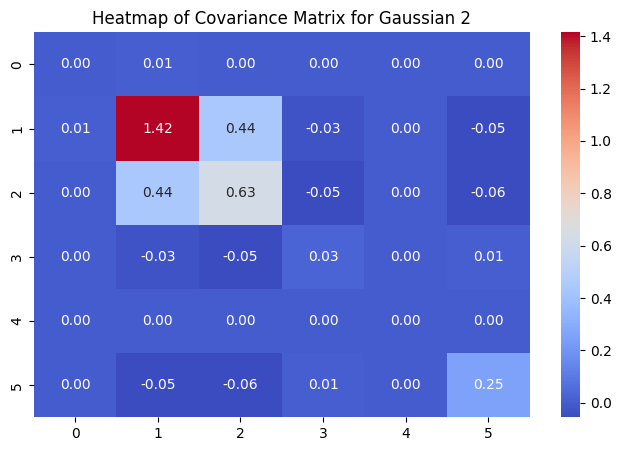

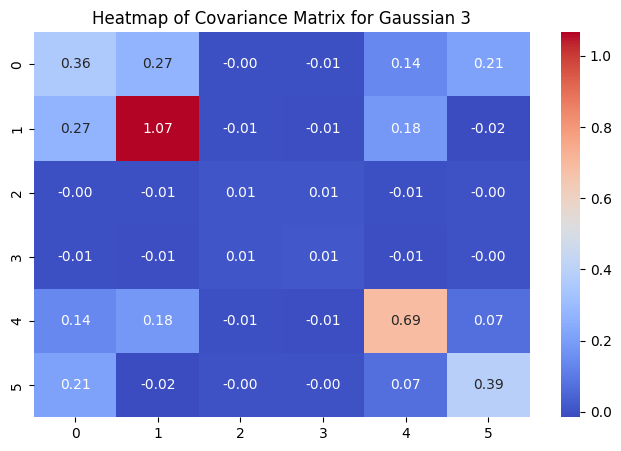

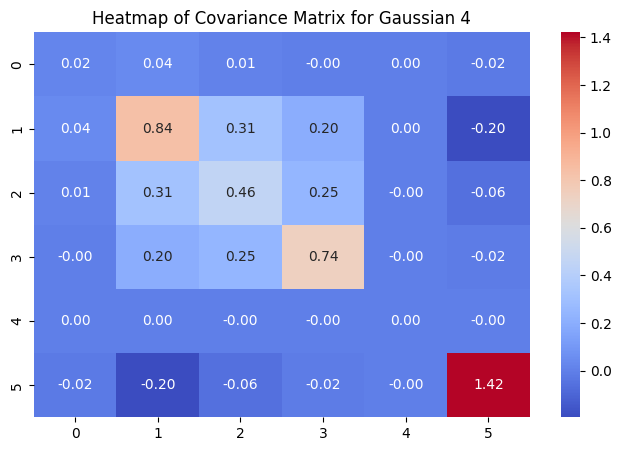

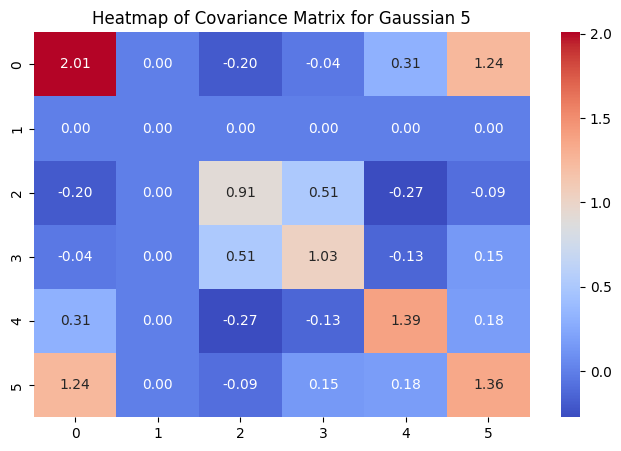

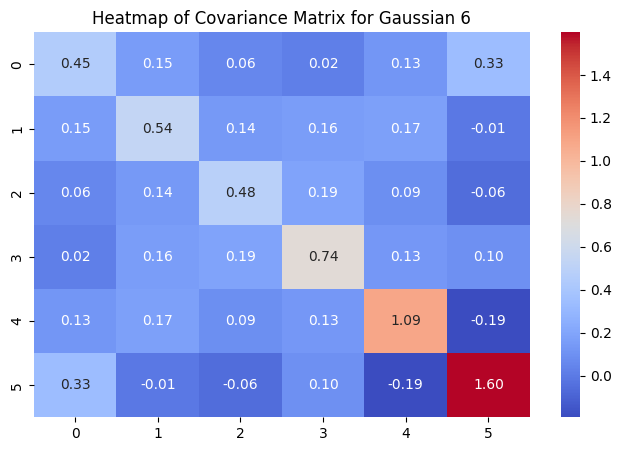

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `covariances` is your array of covariance matrices
for i, cov in enumerate(covariances):
    plt.figure(figsize=(8, 5))
    sns.heatmap(cov,cmap='coolwarm', annot=True, fmt=".2f")
    plt.title(f'Heatmap of Covariance Matrix for Gaussian {i+1}')
    plt.show()

### Analysis of Covariance Matrices:

``Gaussian 1:`` The matrix shows that the largest variance is in variable 3, with a value of 1.49, suggesting that this variable contributes most to the spread of this cluster. The covariance between variables 2 and 3 is also notable (0.28), indicating some positive linear relationship.

``Gaussian 2:`` Here, the highest variance is in variable 1, similar to the first one, with a value of 1.42. There is also a significant positive covariance between variables 1 and 2 (0.44), as well as between variables 2 and 3 (0.63), indicating that these pairs of variables have a tendency to increase together within this cluster.

``Gaussian 3:`` The most significant variance is for variable 3 (1.07), and there is a notable positive covariance between variables 0 and 1 (0.27) as well as between 0 and 4 (0.21), which suggests a pattern of interaction between these variables.

``Gaussian 4:`` The variance is relatively low across variables compared to the other clusters, with the highest being in variable 1 (0.84). There is a noticeable positive covariance between variables 3 and 4 (0.74), which is the most substantial relationship in this cluster.

``Gaussian 5:`` This cluster has the highest variance in variable 0 (2.01), indicating it has the widest spread. The off-diagonal elements show some relationship between variables 0 and 4 (1.24) and between 3 and 4 (1.39), which is quite different from the previous clusters.

``Gaussian 6:`` The variances are more evenly distributed in this cluster, with the highest variance at variable 5 (1.60). The covariance pattern is less pronounced, with smaller values, except for a moderate positive covariance between variables 3 and 4 (0.74).

Across the six matrices, we can see that:

``Different Clusters Have Different Variability:`` Each cluster has different variables with high variance, which suggests that each cluster may be spread out along different dimensions in the data space.

``Variable Interactions Vary:`` Some clusters have variables that show a higher degree of linear relationship (Gaussian 2 and 5), while others have variables that are more independent of each other (Gaussian 4).

``Unique Relationships``: Some clusters have unique covariance relationships that do not appear in others (e.g., the relationship between variables 0 and 4 in Gaussian 5).

### Finding the best Gaussian Mixture model by running all combinations

In [80]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import numpy as np

parameters=['full','tied','diag','spherical']
n_clusters=np.arange(1,11)
results_=pd.DataFrame(columns=['Covariance Type','Number of Cluster','Silhouette Score','Davies Bouldin Score'])
for i in parameters:
    for j in n_clusters:
        gmm_cluster=GaussianMixture(n_components=j,covariance_type=i,random_state=123)
        clusters=gmm_cluster.fit_predict(data_selected)
        if len(np.unique(clusters))>=2:
          results_=results_._append({"Covariance Type":i,'Number of Cluster':j,"Silhouette Score":silhouette_score(data_selected,clusters),
                                    'Davies Bouldin Score':davies_bouldin_score(data_selected,clusters)}
                                   ,ignore_index=True)

In [81]:
display(results_.sort_values(by=["Silhouette Score"], ascending=False)[:5])

,Covariance Type,Number of Cluster,Silhouette Score,Davies Bouldin Score
13,tied,6,0.299504,1.136253
14,tied,7,0.297411,1.189725
16,tied,9,0.295236,1.219852
15,tied,8,0.291371,1.189730
12,tied,5,0.290023,1.165625


In the above comaprison we see that optimal cluster value K* = 6 which has the best silhoutte Score and lowest Davis Bouldin Score

### Running GMM Clustering on the chosen best model
1. K* = 6
2. Covariance Type = tied

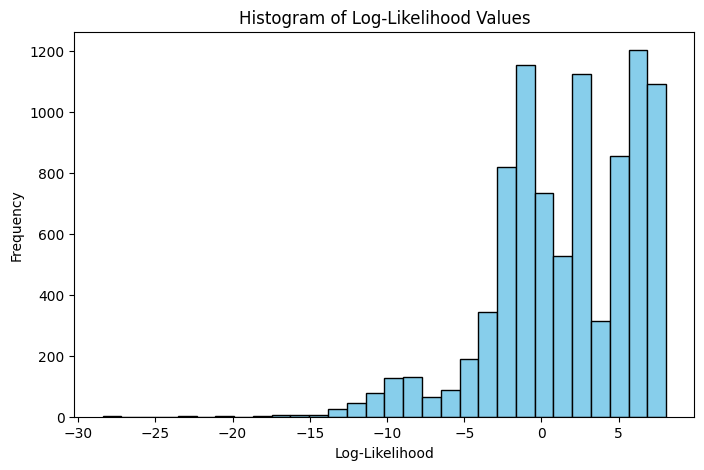

,Gaussian Component,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT
0,0,-0.278051,0.517980,0.692235,0.405838,-0.675294,-0.024165
1,1,-0.739884,-1.646315,-0.032294,-0.574091,-0.675294,-0.424665
2,2,-0.022787,-0.082228,-1.189844,-0.635554,0.503610,-0.378516
3,3,-0.630287,-0.855273,0.074665,0.312637,-0.675294,0.291471
4,4,0.966046,0.517980,0.158314,0.203616,0.873146,0.481308
5,5,-0.102187,-0.466783,0.204166,0.210334,0.575212,0.156599


In [82]:
from sklearn.mixture import GaussianMixture

# Since the optimal number of clusters K* is 4 from the previous K-Means analysis
# We'll use this to set the number of components for GMM
gmm_cluster=GaussianMixture(n_components=6,covariance_type="tied",random_state=123)
gmm_cluster.fit(data_selected)
gmm_labels = gmm_cluster.predict(data_selected)

# The mean vector for each Gaussian
means = gmm.means_

# The covariance matrix for each Gaussian
covariances = gmm.covariances_

# Compute the log-likelihood of each sample
log_likelihood = gmm.score_samples(data_selected)

# Plot the histogram of the resulting log-likelihood values
plt.figure(figsize=(8, 5))
plt.hist(log_likelihood, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Log-Likelihood Values')
plt.xlabel('Log-Likelihood')
plt.ylabel('Frequency')
plt.show()

# Creating a DataFrame for mean vectors for better visualization
means_df = pd.DataFrame(means, columns=data_selected.columns)
means_df.index.name = 'Gaussian Component'
means_df.reset_index(inplace=True)

# Display the mean vectors in a more structured format
means_df

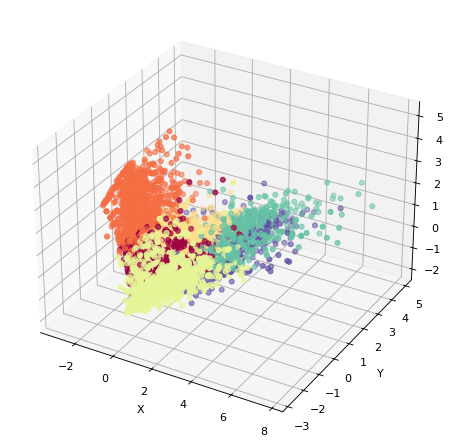

In [83]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=gmm_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')